## Import and Key Findings on Dataset

In [1]:
#!pip install keras
#!pip install tensorflow
#!pip install scikeras

In [2]:
#Libraries
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read CSV file
df_1 = pd.read_csv('glass_data.csv')
df_1

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
#Understand categories
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
#Understand columns rows
df_1.shape

(214, 11)

## Check for null values

In [6]:
#Check for null values
df_1.isnull().sum()

id      0
ri      0
na      0
mg      0
al      0
si      0
k       0
ca      0
ba      0
fe      0
type    0
dtype: int64

In [7]:
# Describe the data
df_1.describe()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
# values less than 0
minus = df_1 < 0
print(df_1[minus.any(axis=1)])

Empty DataFrame
Columns: [id, ri, na, mg, al, si, k, ca, ba, fe, type]
Index: []


## Check for values in the categorical column

In [9]:
df_1['type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

## Check for duplicated rows

In [10]:
df_1.duplicated().sum()

0

## Check for 0 values

In [11]:
# Min value is 0.00, check for 0.00 values
df_zero = (df_1 == 0).sum()

In [12]:
df_zero

id        0
ri        0
na        0
mg       42
al        0
si        0
k        30
ca        0
ba      176
fe      144
type      0
dtype: int64

In [13]:
# Check percentage of 0 values
zero_percentage = (df_1 == 0).mean() * 100
print(zero_percentage)

id       0.000000
ri       0.000000
na       0.000000
mg      19.626168
al       0.000000
si       0.000000
k       14.018692
ca       0.000000
ba      82.242991
fe      67.289720
type     0.000000
dtype: float64


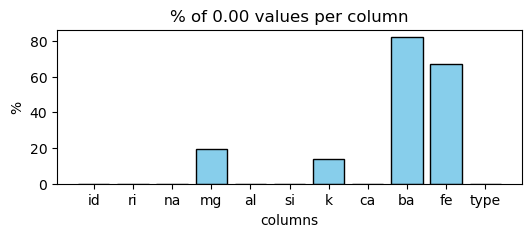

In [14]:
#Graph %
plt.figure(figsize=(6,2))
plt.bar(zero_percentage.index, zero_percentage, color='skyblue', edgecolor='black')

plt.title('% of 0.00 values per column')
plt.xlabel('columns')
plt.ylabel('%')

plt.show()


## Drop ID / BA column

In [15]:
df_1.drop(columns=['id','ba'], inplace=True)

In [16]:
df_1.head()

,ri,na,mg,al,si,k,ca,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


## Check for outliers in each column

In [17]:
## The outliers are correct data, so I will only search for extreme outliers
# Identifying extreme outliers using Inter Quartile Range (using 3 *IQR as this would be extreme)
# Create an empty dictionary to store the outliers
outliers = {}

# Loop through each column to calculate IQR and identify extreme outliers
for column in df_1.columns:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]
   
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)


ri
lower bound: 1.5086175000000002
upper bound: 1.5270624999999998
Outliers in ri:
          ri     na    mg    al     si     k     ca    fe  type
103  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00     2
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  0.28     2
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.24     2
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00     2
112  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00     2
--------------------------------------------------
na
lower bound: 10.155000000000005
upper bound: 16.577499999999993
Outliers in na:
          ri     na   mg    al     si    k    ca   fe  type
184  1.51115  17.38  0.0  0.34  75.41  0.0  6.65  0.0     6
--------------------------------------------------
mg
lower bound: -2.340000000000001
upper bound: 8.055000000000001
Outliers in mg:
Empty DataFrame
Columns: [ri, na, mg, al, si, k, ca, fe, type]
Index: []
--------------------------------------------------
al
lower bound: -0.129

In [ ]:
# create scatter plots for all columns to show extreme outliers
plt.figure(figsize=(25,14))
           
for i, column in enumerate(df_1.columns):
    # 2 rows, 5 columns
    plt.subplot(2, 5, i+1)
    sns.scatterplot(x= df_1.index, y = df_1[column], color='blue', label='Data Points')
    
    #Extrem Outliers in red
    sns.scatterplot(x=outliers[column].index, y=outliers[column][column], color='red', label='Extreme Outliers')
    plt.title(f"Scatter Plot with Extreme Outliers for {column}")
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()

plt.tight_layout()
plt.show()

## Check Skewness to know whether to use median or mean when replacing outliers

In [ ]:
# Check skewness
# skewness > 0, right-skewed / positive
# skewness < 0, left-skewed / negative
# skewness = 0, symmetric

# -0.5 to +0.5 - approx symmetric = mean
# -1 to +1 - moderate skewed = mean
# >1 - substantial skewed = median
# >2 - highly skewed = median

from scipy.stats import skew

#Create storage for skewness
skew_df = {}

# Loop each column for skewness
for columns in df_1.columns:
    #calculate skewness
    col_skew = skew(df_1[columns])
    #Add to dict
    skew_df[columns] = col_skew
    #print
    print(f"skewness for {columns}: {col_skew:.3f}")
    


In [ ]:
# plot skewness for each column
def plot_skewness(df_1):
    plt.figure(figsize=(12, 8))
   
    # Loop through each column 
    for i, columns in enumerate(df_1.columns):
        plt.subplot(3, 4, i + 1)  
        sns.histplot(df_1[columns], kde=True, bins=20, color='skyblue')
       
        # Calculate skewness for the column
        column_skew = skew(df_1[columns])
       
        # Title and annotation for skewness
        plt.title(f'{columns} - Skewness: {column_skew:.3f}')
        plt.xlabel(columns)
        plt.ylabel('Frequency')
   
    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Plot skewness for all columns
plot_skewness(df_1)

## Replace Outliers

In [ ]:
# ri - 5 extreme outliers - Median
# na - 1 extreme outliers -  mean
# mg - 
# al - 3 extreme outliers -  mean
# si - 1 extreme outliers -  mean
# k - 3 extreme outliers -  30 zero values - Median
# ca - 10 extreme outliers - Median
# fe - 1 extreme outliers - 144 zero values- Median

In [ ]:
# replace outliers with median
for col in ['ri', 'k', 'fe','ca']:
    med_val = df_1[col].median()
    df_1[col] = df_1[col].apply(lambda x: med_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)


# Replace outliers in specified columns with mean
for col in ['na', 'al', 'si']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)

df_1.describe()

In [ ]:
# Check again for Outliers to see if any remain as bounds may have shifted
# Loop through each column to calculate IQR and identify extreme outliers
for column in df_1.columns:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"skewness for {column}: {skewness}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)

In [ ]:
# Skewness has shifted so I will replace the remaining outliers in line with new skewness (mean)
# Replace outliers in specified columns with mean
for col in ['ri', 'si', 'ca']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)

#Check outliers again to see if bounds shifting created more
for column in ['ri', 'si', 'ca']:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"skewness for {column}: {skewness}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)

In [ ]:
# Still mean for si and ca - re-run
# Replace outliers in specified columns with mean
for col in ['si', 'ca']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)


for column in ['si', 'ca']:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"skewness for {column}: {skewness}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)

In [ ]:
# Replace outliers in specified columns with mean
for col in ['ca']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)


for column in ['ca']:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"Outliers in {column}:")
    print(f"skewness for {column}: {skewness}")
    print(outliers[column])
    print("-" * 50)

In [ ]:
# Replace outliers in specified columns with mean
for col in ['ca']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)


for column in ['ca']:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"skewness for {column}: {skewness}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)

In [ ]:
# Replace outliers in specified columns with mean
for col in ['ca']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)


for column in ['ca']:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"skewness for {column}: {skewness}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)

## Build Model: Dense Neural Network

In [ ]:
# Split features and target variable

X = df_1.drop('type', axis=1)
y = df_1['type']

In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Build the model
def build_dens_model(activation='relu', optimizer='adam',neurons=64, dropout_rate=0.2, l2_rate=0.01):
    model = Sequential()

    ## First hidden layer with ReLU Activation and regularization
    model.add(layers.Dense(neurons, input_dim=X_train_s.shape[1], activation=activation, kernel_regularizer=regularizers.l2(l2_rate))) 
                           #activation=activation, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))

    
    # Add dropout layer
    model.add(layers.Dropout(dropout_rate))

    #Add second layer
    model.add(layers.Dense(neurons, activation=activation,
                          kernel_regularizer=regularizers.l2(l2_rate))) # Second hidden layer 
    
    
    # Add dropout layer
    model.add(layers.Dropout(dropout_rate))
    
    #Add Output layer (try softmax of sigmoid
    model.add(layers.Dense(6, activation='softmax')) # 6 outputs for 6 classes 

    
    #Choose Optimizer
    if optimizer == 'adam': optimizer = Adam()
    elif optimizer == 'sgd': optimizer = SGD()
    #Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# Build
model = build_dens_model(activation='relu', optimizer='adam',neurons=64, dropout_rate=0.2, l2_rate=0.01)

model.summary()

In [ ]:
# Train the model
model.fit(X_train_s, y_train_s_encoded, epochs=500, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': np.argmax(y_test_encoded, axis=1), 'Predicted': np.argmax(y_pred, axis=1)})
print(results)

In [ ]:
# Classification Report prior to GridSearch
y_pred_c = np.argmax(y_pred, axis=1) 

# Convert true labels from one hot coding to class labels
y_test_c = np.argmax(y_test_encoded,  axis=1)

print(classification_report(y_test_c,y_pred_c))

## Scale and SMOTE before re-applying Model

In [ ]:
## Scale the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# check 'type' column for imbalance

type_imb = df_1['type']

plt.figure(figsize=(4,2))
sns.countplot(x=type_imb, data=df_1, palette = 'Set3')
plt.title("Type of glass distribution of values")
plt.show()

In [ ]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_s, y_train_s = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# check 'type' column after SMOTE

type_imb = df_1['type']

plt.figure(figsize=(4,2))
sns.countplot(x=y_train_s, palette = 'Set3')
plt.title("Type of glass distribution after SMOTE")
plt.show()

In [ ]:
#not acceptiong reshape code so change to numpy array
y_train_s = y_train_s.to_numpy()
y_test = y_test.to_numpy()


In [ ]:
#One hot encoding on multiclass target variable
encoder = OneHotEncoder(sparse_output=False)
y_train_s_encoded = encoder.fit_transform(y_train_s.reshape(-1,1))
y_test_encoded = encoder.transform(y_test.reshape(-1,1))


In [ ]:
# Build the model
def build_dens_model(activation='relu', optimizer='adam',neurons=64, dropout_rate=0.2, l2_rate=0.01):
    model = Sequential()

    ## First hidden layer with ReLU Activation and regularization
    model.add(layers.Dense(neurons, input_dim=X_train_s.shape[1], activation=activation, kernel_regularizer=regularizers.l2(l2_rate))) 
                           #activation=activation, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))

    
    # Add dropout layer
    model.add(layers.Dropout(dropout_rate))

    #Add second layer
    model.add(layers.Dense(neurons, activation=activation,
                          kernel_regularizer=regularizers.l2(l2_rate))) # Second hidden layer 
    
    
    # Add dropout layer
    model.add(layers.Dropout(dropout_rate))
    
    #Add Output layer (try softmax of sigmoid
    model.add(layers.Dense(6, activation='softmax')) # 6 outputs for 6 classes 

    
    #Choose Optimizer
    if optimizer == 'adam': optimizer = Adam()
    elif optimizer == 'sgd': optimizer = SGD()
    #Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model



In [ ]:
# Build
model = build_dens_model(activation='relu', optimizer='adam',neurons=64, dropout_rate=0.2, l2_rate=0.01)

model.summary()

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model
model.fit(X_train_s, y_train_s_encoded, epochs=500, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': np.argmax(y_test_encoded, axis=1), 'Predicted': np.argmax(y_pred, axis=1)})
print(results)

In [ ]:
# Classification Report prior to GridSearch
y_pred_c = np.argmax(y_pred, axis=1) 

# Convert true labels from one hot coding to class labels
y_test_c = np.argmax(y_test_encoded,  axis=1)

print(classification_report(y_test_c,y_pred_c))

## GridsearchCV

In [ ]:
param_grid = {
    'model__activation': ['relu', 'tanh','sigmoid','selu','elu'], # activation function
    'model__neurons':[32, 64, 128, 256, 512], # Wider range
    'model__optimizer': ['adam', 'sgd', 'rmsprop','adagrad'], # optimizers
        
}

In [ ]:
# Wrap the model with KerasClassifier
keras_model = KerasClassifier(build_fn=build_dens_model, epochs=50, batch_size=32, verbose=0)

In [ ]:
#set up GridSearchCV with a Stratified Fold 
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)
grid_search = GridSearchCV(estimator = keras_model, param_grid = param_grid, cv = cv, n_jobs = -1, verbose = 1, scoring='accuracy')

In [ ]:
# fit the model with GridSearchCV
grid_search.fit(X_train_s, y_train_s_encoded,callbacks=[early_stopping])


# Print best parameters from GridSearchCV
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy (cv): {grid_search.best_score_}")

#Evaluate the best model on the test set
best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test_scaled, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
# Classification Report prior to GridSearch
y_pred_class = np.argmax(y_pred, axis=1) 

# Convert true labels from one hot coding to class labels
y_test_class = np.argmax(y_test_encoded,  axis=1)

print(classification_report(y_test_class,y_pred_class))